In [40]:
import bonesis
import pandas as pd
from colomoto_jupyter import tabulate
bonesis.settings["parallel"] = 1 

# computing graph layout...


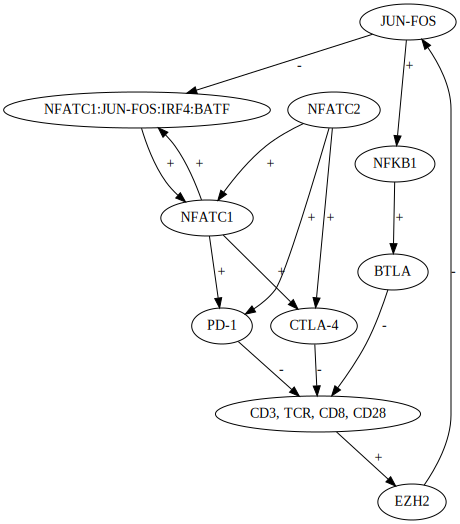

In [41]:
influences = [
("JUN-FOS","NFATC1:JUN-FOS:IRF4:BATF",dict(sign=-1)),  
("CD3, TCR, CD8, CD28","EZH2",dict(sign=1)),
("CTLA-4","CD3, TCR, CD8, CD28",dict(sign=-1)),
("NFATC1","CTLA-4",dict(sign=1)),
("NFATC1","PD-1",dict(sign=1)),
("NFATC1","NFATC1:JUN-FOS:IRF4:BATF",dict(sign=1)),
("NFATC1:JUN-FOS:IRF4:BATF","NFATC1",dict(sign=1)),
("PD-1","CD3, TCR, CD8, CD28",dict(sign=-1)),
("JUN-FOS","NFKB1",dict(sign=1)), 
("NFKB1","BTLA",dict(sign=1)),
("EZH2","JUN-FOS",dict(sign=-1)), 
("BTLA","CD3, TCR, CD8, CD28",dict(sign=-1)),
    
#("TBET-ZEB2","PD-1",dict(sign=-1)),
    
#("IL12-R","TBET-ZEB2",dict(sign=1)),
#("NFATC2","IL12-R",dict(sign=-1)),
("NFATC2","CTLA-4",dict(sign=1)),
("NFATC2","PD-1",dict(sign=1)),
("NFATC2","NFATC1",dict(sign=1)),

]


bonesis_toy = bonesis.InfluenceGraph(influences)
bonesis_toy

In [42]:
#Mixture of dotplot and heatmap
observed_states={
    "zero": {"EZH2":0,"CD3, TCR, CD8, CD28":0,"CTLA-4":0,"IL2-R":0,"NFATC1:JUN-FOS:IRF4:BATF":0,"NFATC1":0,"PD-1":0,"BTLA":0,"JUN-FOS":0,"NFKB1":0,"TBET-ZEB2":0,"PRDM1":0,"BACH2":0,"FOXO1":0,"ID3":0,"BCL6":0,"TCF-1":0,"IL12-R":0,"NFATC2":0},
    "trans":{"CD3, TCR, CD8, CD28":0,"CTLA-4":0,"PD-1":0,"FOXO1":0,"IL12-R":0,"NFATC2":0,"JUN-FOS":0,"TBET-ZEB2":1},
    "mem": {"EZH2":0,"NFATC1":1,"NFKB1":1,"PRDM1":0,"BACH2":1,"NFATC2":0,"JUN-FOS":1,"TBET-ZEB2":0},
    "exh": {"EZH2":1,"CD3, TCR, CD8, CD28":1,"CTLA-4":1,"NFATC1":0,"PD-1":1,"NFKB1":0,"PRDM1":1,"FOXO1":1,"IL12-R":1,"NFATC2":1,"JUN-FOS":0},
}
pd.DataFrame.from_dict(observed_states, orient="index").fillna('')

,EZH2,"CD3, TCR, CD8, CD28",CTLA-4,IL2-R,NFATC1:JUN-FOS:IRF4:BATF,NFATC1,PD-1,BTLA,JUN-FOS,NFKB1,TBET-ZEB2,PRDM1,BACH2,FOXO1,ID3,BCL6,TCF-1,IL12-R,NFATC2
zero,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
mem,0.0,,,,,1.0,,,1,1.0,0.0,0.0,1.0,,,,,,0
exh,1.0,1.0,1.0,,,0.0,1.0,,0,0.0,,1.0,,1.0,,,,1.0,1
trans,,0.0,0.0,,,,0.0,,0,,1.0,,,0.0,,,,0.0,0


In [43]:
bo=bonesis.BoNesis(bonesis_toy, observed_states)

bo.fixed(~bo.obs("exh"))

~bo.obs("mem") >= ~bo.obs("trans") >= ~bo.obs("exh");

#~bo.obs("exh") >= ~bo.obs("mem")

#~bo.obs("zero") / ~bo.obs("mem")
#~bo.obs("zero") / ~bo.obs("trans")
#bo.obs("zero") / ~bo.obs("exh");

In [44]:
for bn in bo.boolean_networks(limit=1): # limit is optional
    print(bn)

Grounding...done in 0.0s
BTLA <- 1
CD3, TCR, CD8, CD28 <- 1
CTLA-4 <- 1
EZH2 <- 1
JUN-FOS <- 0
NFATC1 <- 0
NFATC1:JUN-FOS:IRF4:BATF <- 1
NFATC2 <- 1
NFKB1 <- 0
PD-1 <- 1



In [45]:
solutions = list(bo.boolean_networks())
solutions_backup=solutions
pd.DataFrame(solutions)

Grounding...done in 0.0s


,BTLA,"CD3, TCR, CD8, CD28",CTLA-4,EZH2,JUN-FOS,NFATC1,NFATC1:JUN-FOS:IRF4:BATF,NFATC2,NFKB1,PD-1
0,1,1,1,1,0,0,1,1,0,1
1,1,1,1,1,0,0,0,1,0,1
2,0,1,1,1,0,0,1,1,0,1
3,0,1,1,1,0,0,0,1,0,1
4,1,1,1,1,!EZH2,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
10003,0,!BTLA,NFATC1|NFATC2,1,!EZH2,0,NFATC1,1,0,NFATC2
10004,0,!BTLA,NFATC1|NFATC2,1,!EZH2,0,1,1,0,1
10005,0,!BTLA,NFATC1|NFATC2,1,!EZH2,0,1,1,0,NFATC2
10006,0,!BTLA,NFATC1|NFATC2,1,!EZH2,0,0,1,0,1


In [ ]:
bo.all_fixpoints(bo.obs("exh"))

In [18]:
~bo.obs("mem") >> "fixpoints" ^ {bo.obs(obs) for obs in ["exh"]};

In [ ]:
#~bo.obs("trans") >> "fixpoints" ^ {bo.obs(obs) for obs in ["exh"]};

In [19]:
bo.boolean_networks().count()

Grounding...done in 0.0s


12960

In [22]:
solutions_2 = list(bo.boolean_networks())
pd.DataFrame(solutions_2)

Grounding...done in 0.0s


,BTLA,"CD3, TCR, CD8, CD28",CTLA-4,EZH2,IL12-R,JUN-FOS,NFATC1,NFATC1:JUN-FOS:IRF4:BATF,NFATC2,NFKB1,PD-1,TBET-ZEB2
0,1,1,1,1,1,0,0,1,1,0,1,1
1,1,1,1,1,1,0,0,0,1,0,1,1
2,0,1,1,1,1,0,0,1,1,0,1,1
3,0,1,1,1,1,0,0,0,1,0,1,1
4,1,1,1,1,1,!EZH2,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12955,NFKB1,!BTLA|!PD-1,1,"CD3, TCR, CD8, CD28",1,!EZH2,0,!JUN-FOS&NFATC1,1,0,NFATC2|!TBET-ZEB2,1
12956,NFKB1,!BTLA|!PD-1,NFATC1|NFATC2,"CD3, TCR, CD8, CD28",1,!EZH2,0,!JUN-FOS&NFATC1,1,0,NFATC2,1
12957,NFKB1,!BTLA|!PD-1,NFATC1|NFATC2,"CD3, TCR, CD8, CD28",1,!EZH2,0,!JUN-FOS&NFATC1,1,0,NFATC1|NFATC2,1
12958,NFKB1,!BTLA|!PD-1,NFATC1|NFATC2,"CD3, TCR, CD8, CD28",1,!EZH2,0,!JUN-FOS&NFATC1,1,0,NFATC1|NFATC2|!TBET-ZEB2,1


In [46]:
projs = bo.local_functions()

Grounding...done in 0.0s


In [47]:
projs.as_dict(method="count")

{'JUN-FOS': 2,
 'NFATC1:JUN-FOS:IRF4:BATF': 6,
 'CD3, TCR, CD8, CD28': 6,
 'EZH2': 2,
 'CTLA-4': 3,
 'NFATC1': 3,
 'PD-1': 3,
 'NFKB1': 2,
 'BTLA': 3,
 'NFATC2': 1}

In [ ]:
from functools import reduce
reduce(int.__mul__, _.values())

In [48]:
projs.as_dataframe()

,JUN-FOS,NFATC1:JUN-FOS:IRF4:BATF,"CD3, TCR, CD8, CD28",EZH2,CTLA-4,NFATC1,PD-1,NFKB1,BTLA,NFATC2
0,0,!JUN-FOS,!BTLA,"CD3, TCR, CD8, CD28",NFATC2,0,1,JUN-FOS,NFKB1,1
1,!EZH2,0,!BTLA|!PD-1,1,1,NFATC1:JUN-FOS:IRF4:BATF,NFATC1|NFATC2,0,0,
2,,1,1,,NFATC1|NFATC2,NFATC1:JUN-FOS:IRF4:BATF&NFATC2,NFATC2,,1,
3,,!JUN-FOS|NFATC1,!BTLA|!CTLA-4|!PD-1,,,,,,,
4,,NFATC1,!BTLA|!CTLA-4,,,,,,,
5,,!JUN-FOS&NFATC1,!BTLA|(!CTLA-4&!PD-1),,,,,,,


In [23]:
rules=pd.DataFrame(solutions_2)
repository="/media/ag-cherrmann/ischneider/GRNTcellExh/analysis/bonesis_output/bonesis_toy_rules_top.csv"
rules.to_csv(repository)

In [39]:
solutions_2['JUN-FOS']

TypeError: list indices must be integers or slices, not str

In [37]:
for x in range(len(rules)):
    repository_2="/media/ag-cherrmann/ischneider/GRNTcellExh/analysis/bonesis_output/attractors_top/"+str(x)+".csv"
    att=pd.DataFrame(solutions_2[x].attractors())
    att.to_csv(repository_2)

In [26]:
pd.DataFrame(solutions_2[4000].attractors())

,BTLA,"CD3, TCR, CD8, CD28",CTLA-4,EZH2,IL12-R,JUN-FOS,NFATC1,NFATC1:JUN-FOS:IRF4:BATF,NFATC2,NFKB1,PD-1,TBET-ZEB2
0,0,1,1,1,1,0,0,1,1,0,1,1
